In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
temp_state = pd.read_csv('C:\\Users\\shane\\Desktop\\GlobalLandTemperaturesByState.csv',parse_dates=['dt'])

In [3]:
temp_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
dt                               645675 non-null datetime64[ns]
AverageTemperature               620027 non-null float64
AverageTemperatureUncertainty    620027 non-null float64
State                            645675 non-null object
Country                          645675 non-null object
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.6+ MB


In [4]:
temp_state.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [5]:
temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [6]:
temp_state['AverageTemperature F']= (9/5)*temp_state['AverageTemperature']+32

Selecting for US weather only. Then making seperate dataframe for California

In [7]:
US_state_temp = temp_state[temp_state['Country']=='United States']

Renaming Georgia (State) to Georgia

In [8]:
US_state_temp.replace({'Georgia (State)':'Georgia'},inplace=True)

C:\Users\shane\Anaconda3\lib\site-packages\pandas\core\generic.py:3466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [9]:
Cali_temp = US_state_temp[US_state_temp['State']=='California']

Grouping and Averaging by Year



In [10]:
Cali_temp_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).mean()
Cali_temp_yr.reset_index(inplace=True)
Cali_temp_yr.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,AverageTemperature F
0,1849,14.020083,2.498167,57.23615
1,1850,13.717917,1.879583,56.69225
2,1851,14.143583,2.078417,57.45845
3,1852,13.839833,2.246000,56.91170
4,1853,14.592833,1.749000,58.26710


In [11]:
Cali_temp['dt'].dt.year.min()

1849

In [12]:
Cali_temp_max_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).max()
Cali_temp_max_yr.drop('dt',axis=1,inplace=True)
Cali_temp_max_yr.reset_index(inplace=True)
Cali_temp_min_yr=Cali_temp.groupby(Cali_temp['dt'].dt.year).min()
Cali_temp_min_yr.drop('dt',axis=1,inplace=True)
Cali_temp_min_yr.reset_index(inplace=True)

2013 data is omitted as the year data is incomplete and does not contain all winter months

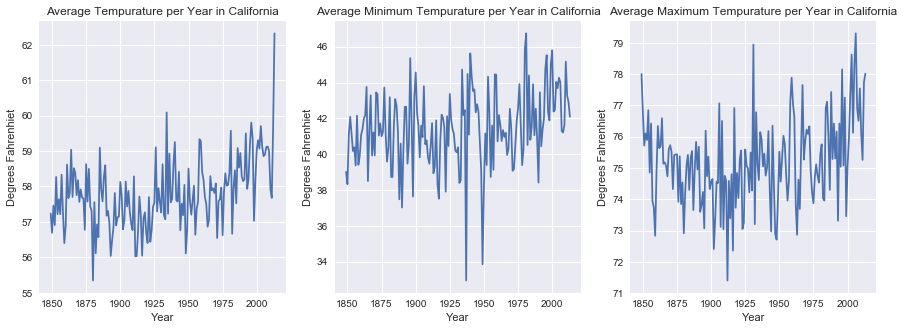

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(Cali_temp_yr['dt'],Cali_temp_yr['AverageTemperature F'])
plt.title('Average Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

plt.subplot(132)
plt.plot(Cali_temp_min_yr['dt'],Cali_temp_min_yr['AverageTemperature F'])
plt.title('Average Minimum Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

plt.subplot(133)
plt.plot(Cali_temp_max_yr['dt'],Cali_temp_max_yr['AverageTemperature F'])
plt.title('Average Maximum Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

plt.show()

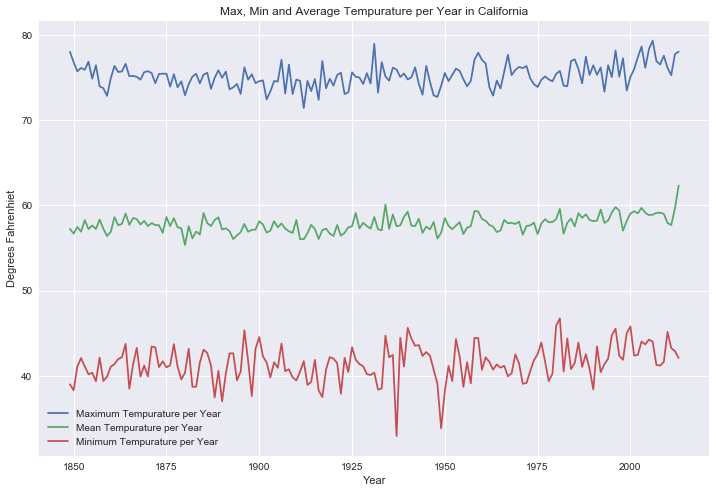

In [14]:
plt.figure(figsize=(12,8))
plt.plot(Cali_temp_max_yr['dt'],Cali_temp_max_yr['AverageTemperature F'])
plt.plot(Cali_temp_yr['dt'],Cali_temp_yr['AverageTemperature F'])
plt.plot(Cali_temp_min_yr['dt'],Cali_temp_min_yr['AverageTemperature F'])
plt.title('Max, Min and Average Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

plt.legend(('Maximum Tempurature per Year','Mean Tempurature per Year','Minimum Tempurature per Year'))

Calculating basic linear fit of warming data

In [15]:
slope,intercept= np.polyfit(y=Cali_temp_yr['AverageTemperature F'],x=Cali_temp_yr['dt'], deg=1)
linear = [slope * i + intercept for i in Cali_temp_yr['dt']]

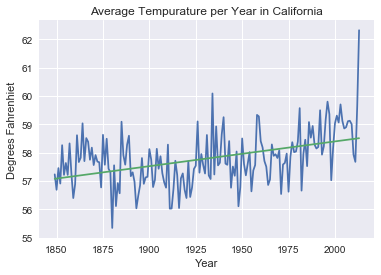

In [16]:
plt.plot(Cali_temp_yr['dt'],Cali_temp_yr['AverageTemperature F'])
plt.plot(Cali_temp_yr['dt'],linear)
plt.title('Average Tempurature per Year in California')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [17]:
US_temp_yr=US_state_temp.groupby(US_state_temp['dt'].dt.year).mean()
US_temp_yr.reset_index(inplace=True)
US_temp_yr=US_temp_yr[(US_temp_yr['dt']<2013)&(US_temp_yr['dt']>1850)]

In [18]:
slope,intercept= np.polyfit(y=US_temp_yr['AverageTemperature F'],x=US_temp_yr['dt'], deg=1)
linear = [slope * i + intercept for i in US_temp_yr['dt']]

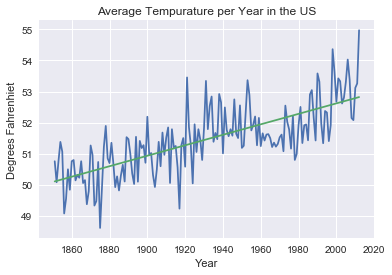

In [19]:
plt.plot(US_temp_yr['dt'],US_temp_yr['AverageTemperature F'])
plt.plot(US_temp_yr['dt'],linear)
plt.title('Average Tempurature per Year in the US')
plt.xlabel('Year')
plt.ylabel('Degrees Fahrenhiet')

In [20]:
state_codes={'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA',
       'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 'District Of Columbia':'DC',
       'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL',
       'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME',
       'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS',
       'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH',
       'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC',
       'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA',
       'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD', 'Tennessee':'TN',
       'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA',
       'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

In [21]:
US_state_temp["Codes"]=US_state_temp["State"]
US_state_temp.replace({'Codes':state_codes}, inplace = True)
US_state_temp['State'].unique()

C:\Users\shane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shane\Anaconda3\lib\site-packages\pandas\core\generic.py:3485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

Creating a loop to run through each state and return the average increase in temperature per year, assuming a linear increase

In [22]:
listmean=[]
for state in US_state_temp["State"].unique():
    state_temp=US_state_temp[US_state_temp['State']==state]
    state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']>1850)&(state_temp_yr['dt']<2013)]
    slope,intercept= np.polyfit(y=state_temp_yr['AverageTemperature F'],x=state_temp_yr['dt'], deg=1)
    difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
    code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
    listmean.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])
states_slope_data=pd.DataFrame(data=listmean,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])

In [23]:
states_slope_data.sort_values('Slope',ascending=False).head()

,State,Slope,Years,1st Yr,Last Yr,Codes
23,Minnesota,0.023509,161,1851,2012,MN
34,North Dakota,0.022959,161,1851,2012,ND
29,New Hampshire,0.021732,161,1851,2012,NH
45,Vermont,0.021638,161,1851,2012,VT
21,Massachusetts,0.021468,161,1851,2012,MA


In [24]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [25]:
def choropleth_plot(max_mean_min,year_start):
    if year_start<1847:
        print('US state records are incomplete, please select a date after 1846')
    list_state=[]
    states_slope_data1=pd.DataFrame(columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])
    for state in US_state_temp['State'].unique():
        state_temp=US_state_temp[US_state_temp['State']==state]
        if max_mean_min=='mean':
            title_plt='Mean'
            state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
        elif max_mean_min=='max':
            title_plt='Maximum'
            state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).max()
            state_temp_yr.drop('dt',axis=1,inplace=True)
        elif max_mean_min=='min':
            title_plt='Minimum'
            state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).min()
            state_temp_yr.drop('dt',axis=1,inplace=True)
        else:
            print('please enter mean, max, or min')
        state_temp_yr.reset_index(inplace=True)
        state_temp_yr=state_temp_yr[(state_temp_yr['dt']>=year_start)&(state_temp_yr['dt']<2013)]
        slope,intercept= np.polyfit(x=state_temp_yr['dt'],y=state_temp_yr['AverageTemperature F'], deg=1)
        difference_years=state_temp_yr['dt'].max()-state_temp_yr['dt'].min()
        code=US_state_temp[US_state_temp['State']==state]['Codes'].unique()[0]
        list_state.append([state,slope,difference_years,state_temp_yr['dt'].min(),state_temp_yr['dt'].max(),code])     

    states_slope_data1=pd.DataFrame(data=list_state,columns=['State','Slope','Years','1st Yr','Last Yr','Codes'])
    
    data = dict(type ='choropleth',
           colorscale = 'YIOrRD',
           locations = states_slope_data1['Codes'],
           locationmode = 'USA-states',
           z = states_slope_data1['Slope'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
           colorbar = {'title':'Degree increase in F'})
    title_plot='Average Increase in {} Tempurature in US per Year from {}-2012'.format(title_plt,year_start)
    layout = dict(title = title_plot,geo = dict(scope = 'usa'))
    
    choromap2 = go.Figure(data = [data], layout = layout)
    iplot(choromap2)

In [26]:
choropleth_plot('min',1900)

Function to graph max/min/mean for each state. Will return an error if typed incorrectly or if the minimum year is before data collection began.

In [27]:
def state_temp(state_name, max_min_mean, min_year):
    state_temp = US_state_temp[US_state_temp['State']==state_name]
    dates=range(min_year,2013)
    if max_min_mean=='mean':
        state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).mean()
        name='Average'
    elif max_min_mean=='max':
        state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).max()
        state_temp_yr.drop('dt',axis=1,inplace=True)
        name='Maximum'
    elif max_min_mean=='min':  
        state_temp_yr=state_temp.groupby(state_temp['dt'].dt.year).min()
        state_temp_yr.drop('dt',axis=1,inplace=True)
        name='Minimum'
    else:
        print('Data entered incorrectly')
        
    state_temp_yr.reset_index(inplace=True)
    state_temp_yr=state_temp_yr[(state_temp_yr['dt']<2013)&(state_temp_yr['dt']>=min_year)]
    
    if state_temp_yr.isnull().values.any()==True:
        print('Dates contains NAN values please reselect')
    
    temps=state_temp_yr['AverageTemperature F']
    title='Average {} Tempurature per Year in {}'.format(name,state_name)
    slope,intercept= np.polyfit(y=temps,x=dates, deg=1)
    linear = [slope * i + intercept for i in dates] 
        
        
    plt.figure(figsize=(9,6))    
    plt.plot(dates,temps)
    plt.plot(dates,linear)    
    plt.title(title)

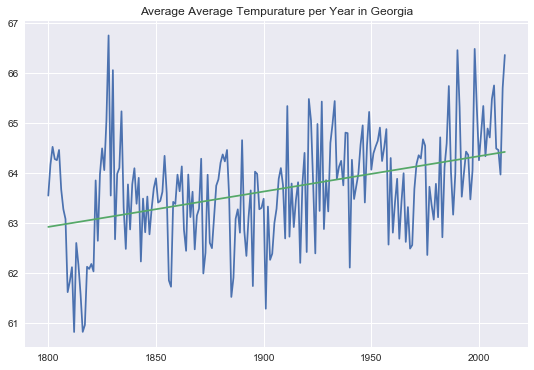

In [28]:
state_temp('Georgia','mean',1800)